Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the dataset:

In [3]:
df= pd.read_csv(r"C:\Users\Dell Pc\Downloads\metaverse_transactions_dataset.csv")
df.head(5)

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


Dropping the couloumns that aren't of any use for the model

In [4]:
dropcl=['sending_address', 'receiving_address', 'timestamp']
df = df.drop(columns=dropcl)
df.head(5)

,hour_of_day,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,12,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,19,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,16,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,9,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,14,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


### Scaling numerical coloumns 

We use MinMaxScaler to scale the numerical columns to a specified range. We are normalizing the values between 0 and 1, so that no paritcular feature dominates solely based on its magnitude thereby previnting bias in the model towards variables with larger scales

In [5]:
from sklearn.preprocessing import MinMaxScaler
numerical_coloumns= ['hour_of_day', 'amount', 'ip_prefix', 'login_frequency', 'session_duration']
scaler = MinMaxScaler()
df[numerical_coloumns]= scaler.fit_transform(df[numerical_coloumns])
df.head()

,hour_of_day,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,0.521739,0.511796,transfer,Europe,0.999078,0.285714,0.201439,focused,established,18.75,low_risk
1,0.826087,0.000000,purchase,South America,0.889289,0.571429,0.294964,focused,established,25.00,low_risk
2,0.695652,0.499754,purchase,Asia,1.000000,0.285714,0.388489,focused,established,31.25,low_risk
3,0.391304,0.193193,transfer,South America,0.889289,1.000000,0.654676,high_value,veteran,36.75,low_risk
4,0.608696,0.498066,sale,Africa,0.890167,0.714286,0.575540,high_value,veteran,62.50,moderate_risk


### One-hot-encoding of categorical columns

Using the get_dummies function we convert the categorical variables into indicator variables. This allows algorithms to interpret categorical data as numerical data, facilitating their inclusion in the model

In [6]:
import pandas as pd
categorical_features = ['transaction_type', 'location_region', 'purchase_pattern', 'age_group']

# Use pandas get_dummies to perform one-hot encoding
df= pd.get_dummies(df, columns=categorical_features)
df.head(5)


,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score,anomaly,transaction_type_phishing,transaction_type_purchase,transaction_type_sale,...,location_region_Asia,location_region_Europe,location_region_North America,location_region_South America,purchase_pattern_focused,purchase_pattern_high_value,purchase_pattern_random,age_group_established,age_group_new,age_group_veteran
0,0.521739,0.511796,0.999078,0.285714,0.201439,18.75,low_risk,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,0.826087,0.000000,0.889289,0.571429,0.294964,25.00,low_risk,False,True,False,...,False,False,False,True,True,False,False,True,False,False
2,0.695652,0.499754,1.000000,0.285714,0.388489,31.25,low_risk,False,True,False,...,True,False,False,False,True,False,False,True,False,False
3,0.391304,0.193193,0.889289,1.000000,0.654676,36.75,low_risk,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,0.608696,0.498066,0.890167,0.714286,0.575540,62.50,moderate_risk,False,False,True,...,False,False,False,False,False,True,False,False,False,True


# Linear Regression Model:

The following linear regression model predicts the risk_score associated with each transaction

**Description:**
* We drop the 'risk_Score' column which is to be prediced along with the 'anomaly' coloumn because including it as a feature might have introduced data leakage, affecting the model performance

* 'train_test_split' generates an array of indices representing the length of the dataset then it shuffles the indices to ensure randomization, calculates teh size of the test set based on the specified test size, and then divides it into training and testing sets.

* 'CustomLinearRegression' class has a constructor that first initializes the model with default values for learning_rate, no. of iterateions, weights and biases. The 'fit' method trains teh model by iteratively updaing hte weights and bias using gradient descent. it computes the target values using current parameter values, calculates the loss funcgions and then updates the parameters using the gradients.

* the 'predict' method predicts the target values for input data using the trained model. it computes y_predicted based on the input features, weights and bias parameters.

In [7]:
# Excluding timestamp, target variable, and risk_score
X = df.drop(columns=['anomaly', 'risk_score']).values.astype(float)  
y = df['risk_score'].values.astype(float)

# Splitting the data into training and testing sets
def train_test_split_custom(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    test_size = int(len(X) * test_size)
    X_train, X_test = X[indices[:-test_size]], X[indices[-test_size:]]
    y_train, y_test = y[indices[:-test_size]], y[indices[-test_size:]]
    return X_train, X_test, y_train, y_test

class LinearRegressionCustom:
    def __init__(self, learning_rate=0.001, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = 0.0  # Initialize bias as a float value
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegressionCustom(learning_rate=0.07, n_iterations=5000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

rmse = root_mean_squared_error(y_test, y_pred)
print("\nRoot Mean Squared Error:", rmse)

# Creating a DataFrame to compare original and predicted values
results_df = pd.DataFrame({'Original Risk Score': y_test, 'Predicted Risk Score': y_pred})
print("Some Original and Predicted Risk Values:")
print(results_df.tail(10))



Root Mean Squared Error: 4.703724323299782
Some Original and Predicted Risk Values:
       Original Risk Score  Predicted Risk Score
15710              50.0000             50.355425
15711              33.7500             32.520190
15712              43.7500             44.163775
15713              35.4375             35.476861
15714              67.5000             54.801610
15715              52.5000             62.543959
15716              47.2500             43.744220
15717              26.2500             27.257986
15718              90.0000             96.870722
15719              67.5000             56.727986


These risk scores seem to be close enough to the actual scores. There is some variation, which is less in some cases but more in other. Overall the model seems to be performing well at predicting the risk scores associated with various transactions.

# Plots:

**Scatter Plot:**
* we create a scatter plot where x-axis represents the actual risk scores and the y-axis represents the predicted risk_scores. Each point on the plt represents a sample from the testing data.


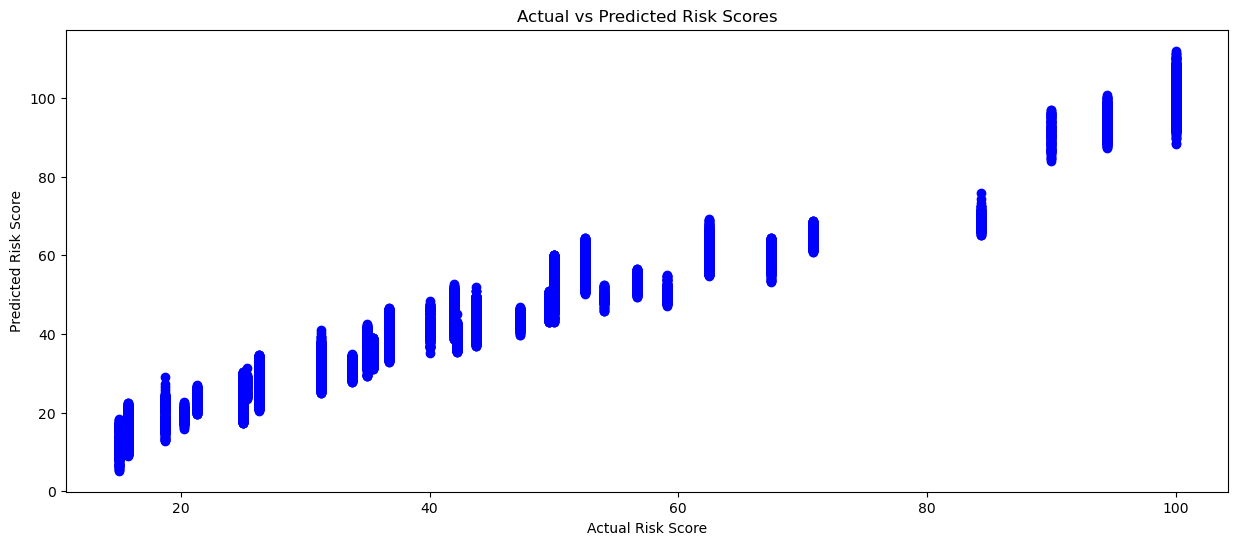

In [8]:
# Plot Actual vs Predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted Risk Scores')
plt.xlabel('Actual Risk Score')
plt.ylabel('Predicted Risk Score')
plt.show()


There is a positive correlation between predicted risk scores and actual risk scores. As the actual risk increases so do the model's predicted values. The model is somewhat successful excepr for a few points where there is a slight difference in the predicted values as sugguested also by the RMSE above.

**Residual Plot:**
* we calculate the residuals(erros) between the actual and predicted values and visualize thier distribution using a histogram plot.

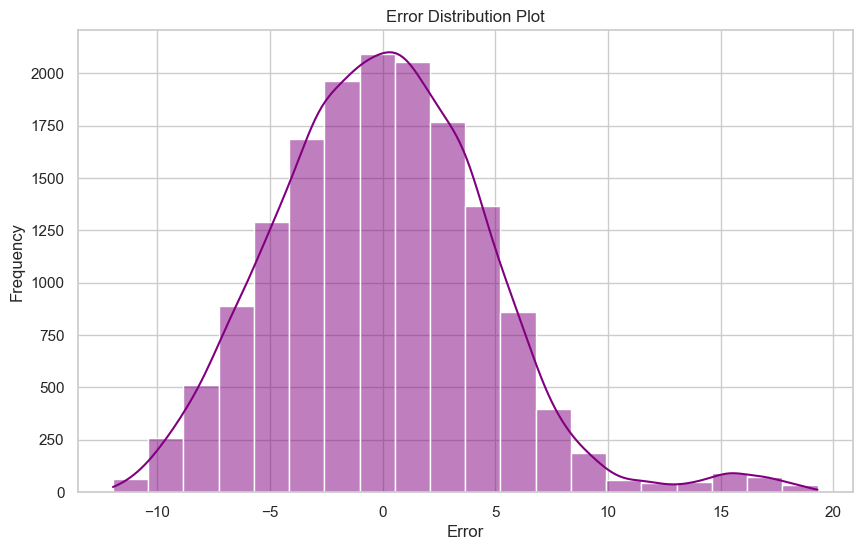

In [144]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, kde=True, color='purple')
plt.title('Error Distribution Plot')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

The graph is a histogram showing the distribution of errors in the model's predictions. The most frequent residual is 0, i.e the error in the acutal and predicted values in most cases is 0. Only a few points fall further away from the as here are only a few predictions where the error score reaches -10, and 20. This suggests thath teh errors are random and there is no underlying bias affecting the model predictions.